# Human Diffusion

### A Q-Learning Process About The Human Migration From Africa

We start by importing the proper modules (equivalent to libraries in R).

These are

- NumPy
- MatPlotLib
- PIL, (Pillow) an image handler
- tqdm, (pronounced ta-qa-dum) from Arabic (taqadum, تقدّم) meaning *progress*, is a simple progress bar to be able to estimate the time for each task



In [1]:
#pip install -r requirements.txt

In [2]:
from earth import Earth

## Generating the Map
We initialise the picture that we want to use, and convert it into pixel values, so we can have a pure black and white image of the earth to use.

In [3]:
stage = Earth('earth.jpg')

The following forloop checks each individual pixel and the converts it to black or white. The threshold was found through running the loop many times and picking a number that looked good enough.

In [4]:
stage.black_and_white('newPixels.csv', 'pure-bw-earth.jpg')

100%|██████████████████████████████████████████████████████████| 2407680/2407680 [00:00<00:00, 3901452.03it/s]


We then generate the new picture and save it before we convert it into an array.

In [5]:
stage.generate_image('pure-bw-earth.jpg')

100%|████████████████████████████████████████████████████████████████████| 1254/1254 [00:02<00:00, 440.40it/s]


We are now ready to create the map we will need.

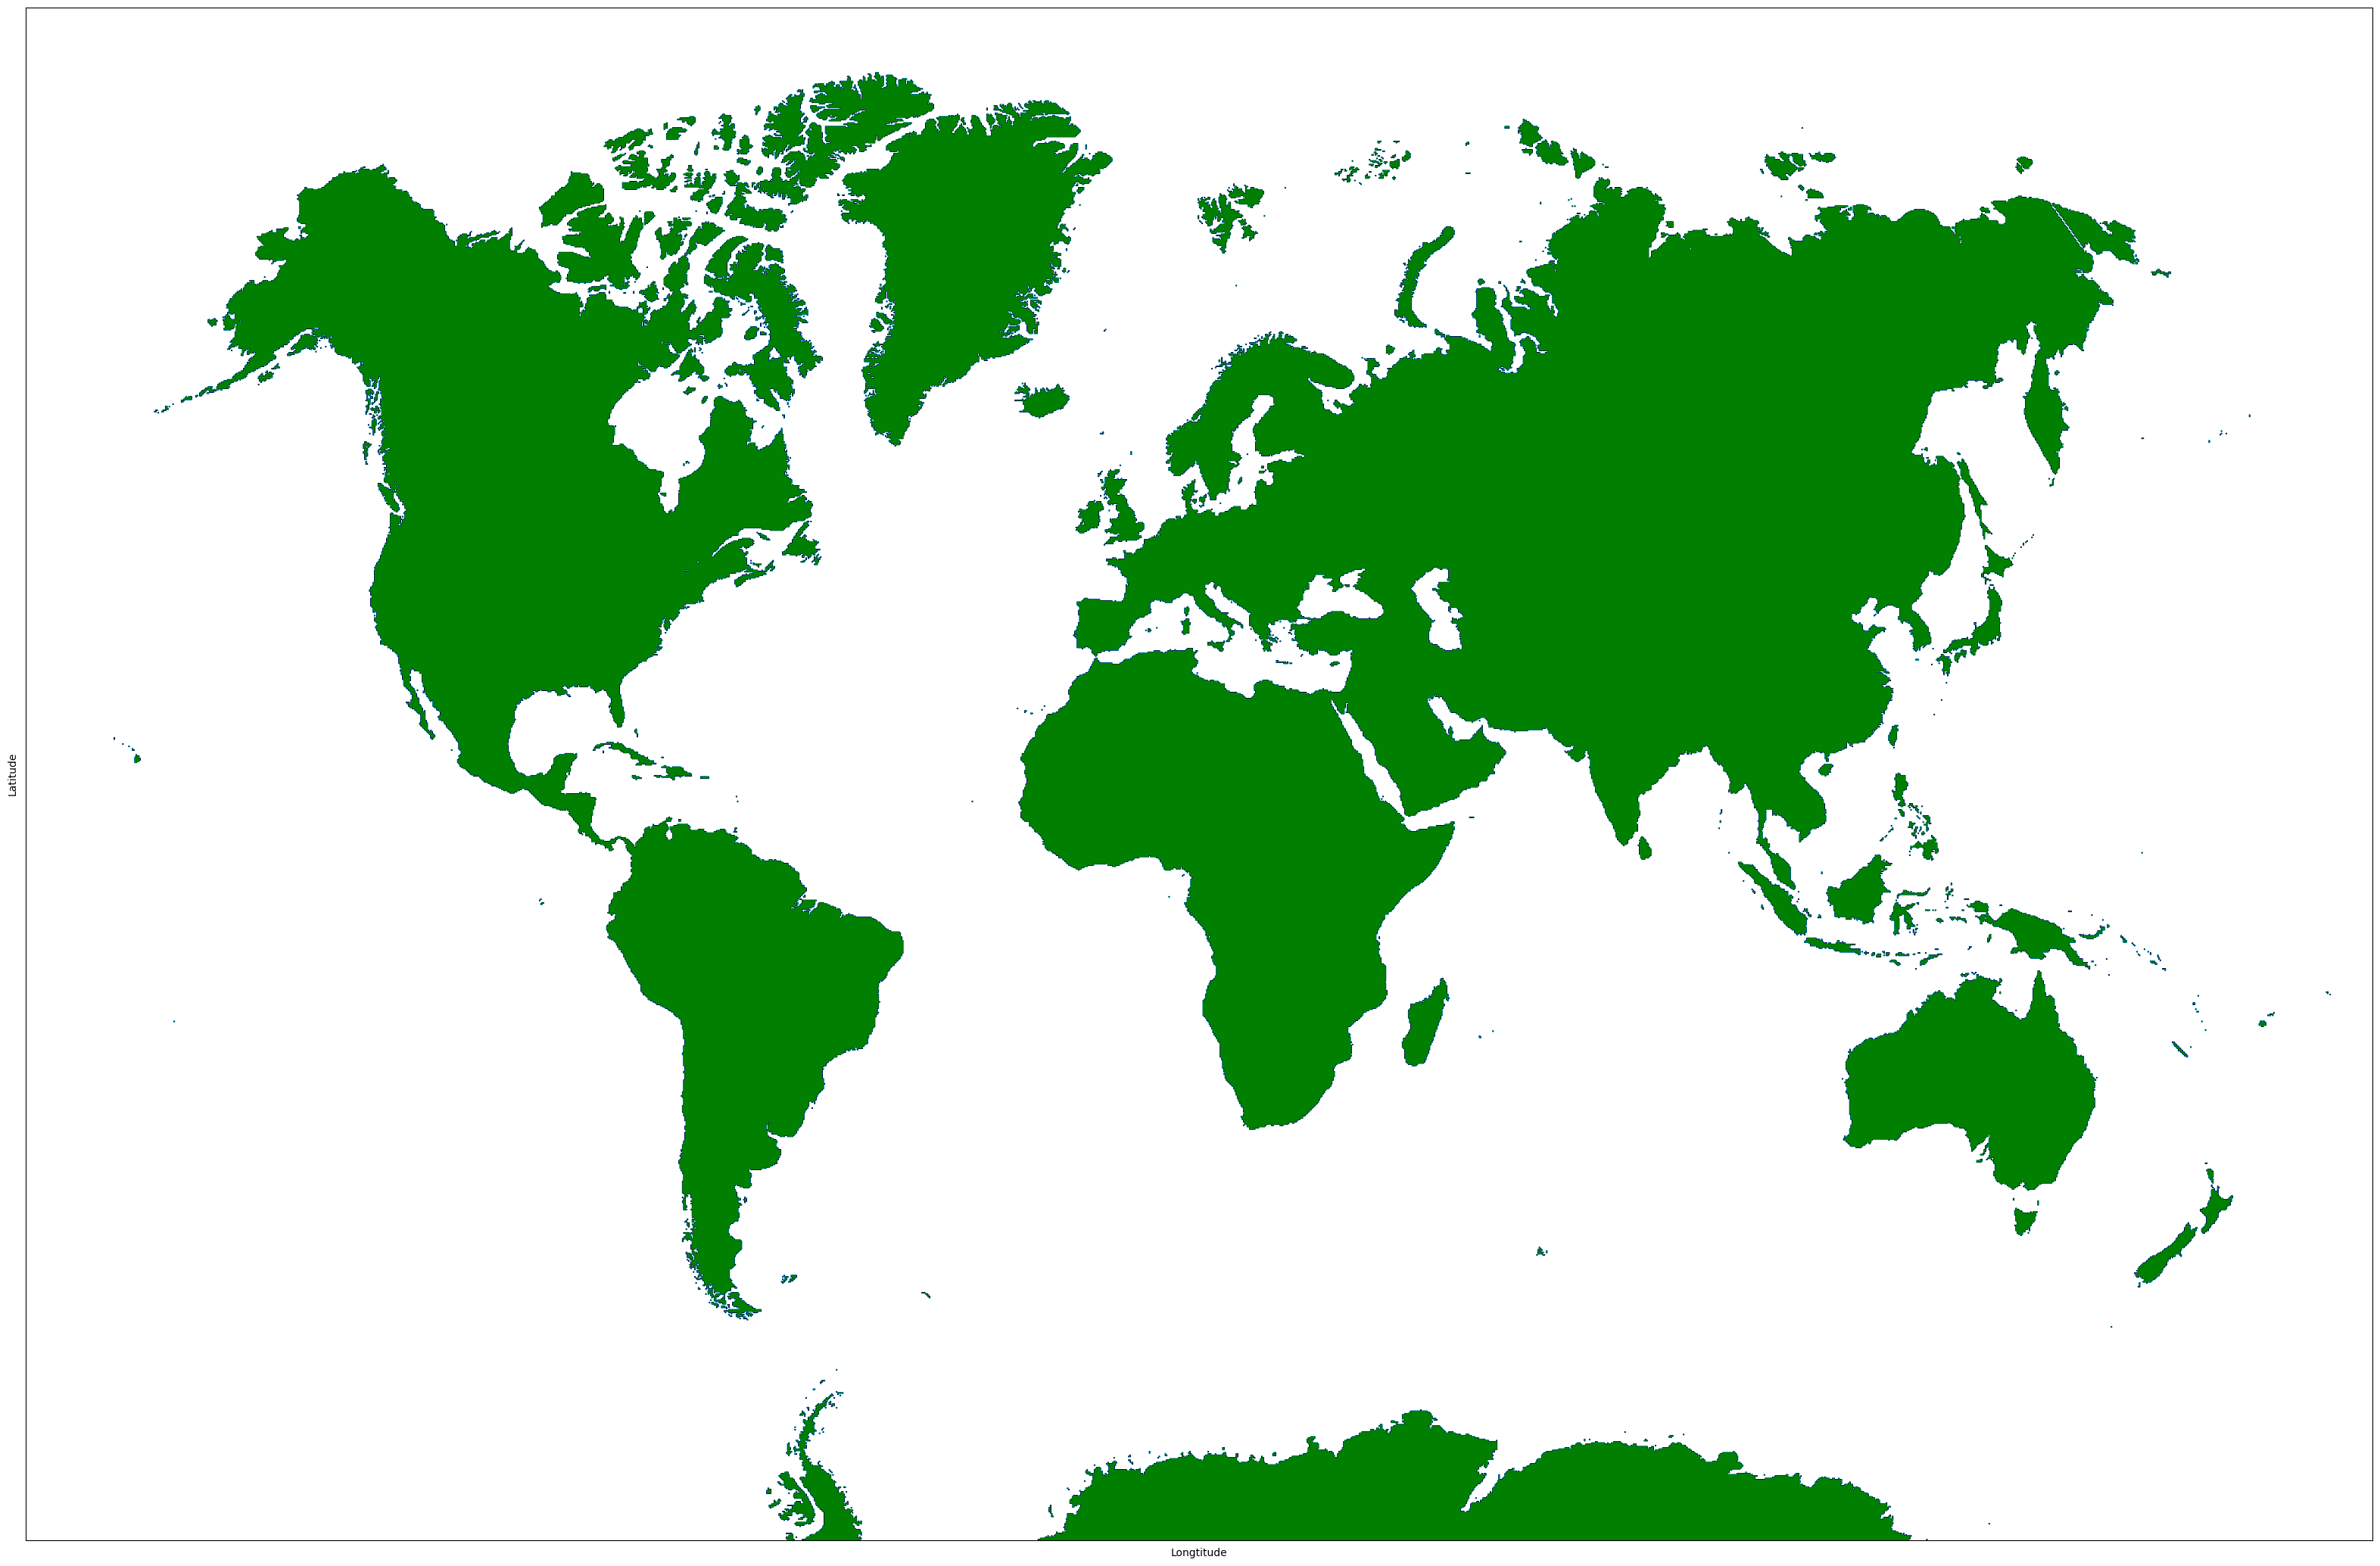

In [6]:
stage.plot('map.jpg')

Now that we have our map ready, we can move on to the implementation of the algorithm.

## The Timeline of Human Migration

The general accepted theory is that the first humans emerged in the Horn of Africa (Modern Day Ethiopia, Somalia and Eritrea), about 198 thousand years ago[1]. After 

![](migrationwaves.png)

## Q-Learning

First we need to define the actions that the program will use, which will be the ability to go north, south, west, and east.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [663]:
actions = ['west', 'east', 'north', 'south']
#coded to 0, 1, 2, 3

Then we can generate the Q-map, which gives the rewards.

In [743]:
reward_map = -1*np.ones(shape=(stage.height,stage.width))
reward_map[np.where(stage.map > 0)] = -200

#AFRICA
    #Ethiopia
# reward_map[680:690, 1105:1115] = 10

    #Egypt
# # reward_map[575:585, 1045:1055] = 10

    #South Africa
reward_map[855:865, 1045:1055] = 10

    #Mali
reward_map[660:670, 905:915] = 10

    #Kongo
reward_map[750:760, 975:985] = 10

    #North Africa
reward_map[550:560, 905:915] = 10



#ASIA
    #China
reward_map[575:585, 1475:1485] = 10

    #India
reward_map[585:595, 1265:1275] = 10

    #Caucasus
reward_map[485:495, 1120:1130] = 10

#EUROPE
    #Haemos
reward_map[480:490, 1015:1025] = 10

    #Italy
reward_map[480:490, 955:965] = 10

    #Russia
reward_map[405:415, 1070:1080] = 10

    #Germania
reward_map[435:445, 955:965] = 10

    #Iberia
reward_map[500:510, 875:885] = 10

    #France
reward_map[460:470, 910:920] = 10


#MIDDLE EAST
    #Hattusa
reward_map[510:520, 1060:1070] = 10



    #Assyria
reward_map[540:550, 1100:1110] = 10

stage.width

1920

In [744]:
def starting_area():
    col = np.random.randint(680, 690)
    row = np.random.randint(1105, 1115)
    return col, row
    
    
def next_action(current_height, current_width, epsilon):
    if np.random.random() < epsilon:
        move = np.argmax(q_values[current_height, current_width])
    else:
        move = np.random.randint(4)
    return move
    
    
def next_location(height, width, action):
    new_width = width
    new_height = height
    
    if actions[action] == 'west':
        if width == 0:
            new_width = stage.width
        else:
            new_width = width - 1
            
    if actions[action] == 'east':
        if width == stage.width:
            new_width = 0
        else:
            new_width = width + 1
            
    if actions[action] == 'north' and height > 1:
        new_height = height -1
    
    if actions[action] == 'south' and height < stage.height:
        new_height = height +1
        
   
    return new_height, new_width
            

Put on some Mortal Kombat music cause it's about to get serious

In [745]:
q_values = np.random.uniform(size=(stage.height,stage.width, len(actions)))

In [746]:
for i in tqdm(np.arange(1000)):
    epsilon = 0.8
    discount_factor = 0.9
    learning_rate = 0.9
    timescale = np.arange(-100, 0, 0.1)

    height, width = starting_area()

    for year in timescale:
        
        reward_map[680:690, 1105:1115] = 10
            #Egypt
        reward_map[575:585, 1045:1055] = 10

    #South Africa
        reward_map[855:865, 1045:1055] = 10

    #Mali
        reward_map[660:670, 905:915] = 10

    #Kongo
        reward_map[750:760, 975:985] = 10
    
    #North Africa
        reward_map[550:560, 905:915] = 10



#ASIA
    #China
        reward_map[575:585, 1475:1485] = 10

    #India
        reward_map[585:595, 1265:1275] = 10
    
    #Caucasus
        reward_map[485:495, 1120:1130] = 10

#EUROPE
    #Haemos
        reward_map[480:490, 1015:1025] = 10

    #Italy
        reward_map[480:490, 955:965] = 10

    #Russia
        reward_map[405:415, 1070:1080] = 10

    #Germania
        reward_map[435:445, 955:965] = 10

    #Iberia
        reward_map[500:510, 875:885] = 10
    
    #France
        reward_map[460:470, 910:920] = 10


#MIDDLE EAST
    #Hattusa
        reward_map[510:520, 1060:1070] = 10



    #Assyria
        reward_map[540:550, 1100:1110] = 10
            #Arabia
        reward_map[620:630, 1140:1150] = 10
        action = next_action(height, width, epsilon)
        # print(action)
        old_height, old_width = height, width
        height, width = next_location(height, width, action)

        reward = reward_map[height, width]
        old_q_value = q_values[old_height, old_width, action]
        temporal_difference = reward + (discount_factor*np.max(q_values[height, width])) - old_q_value
        
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_height, old_width, action] = new_q_value
        reward_map[old_height, old_width] = -100

100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.64it/s]


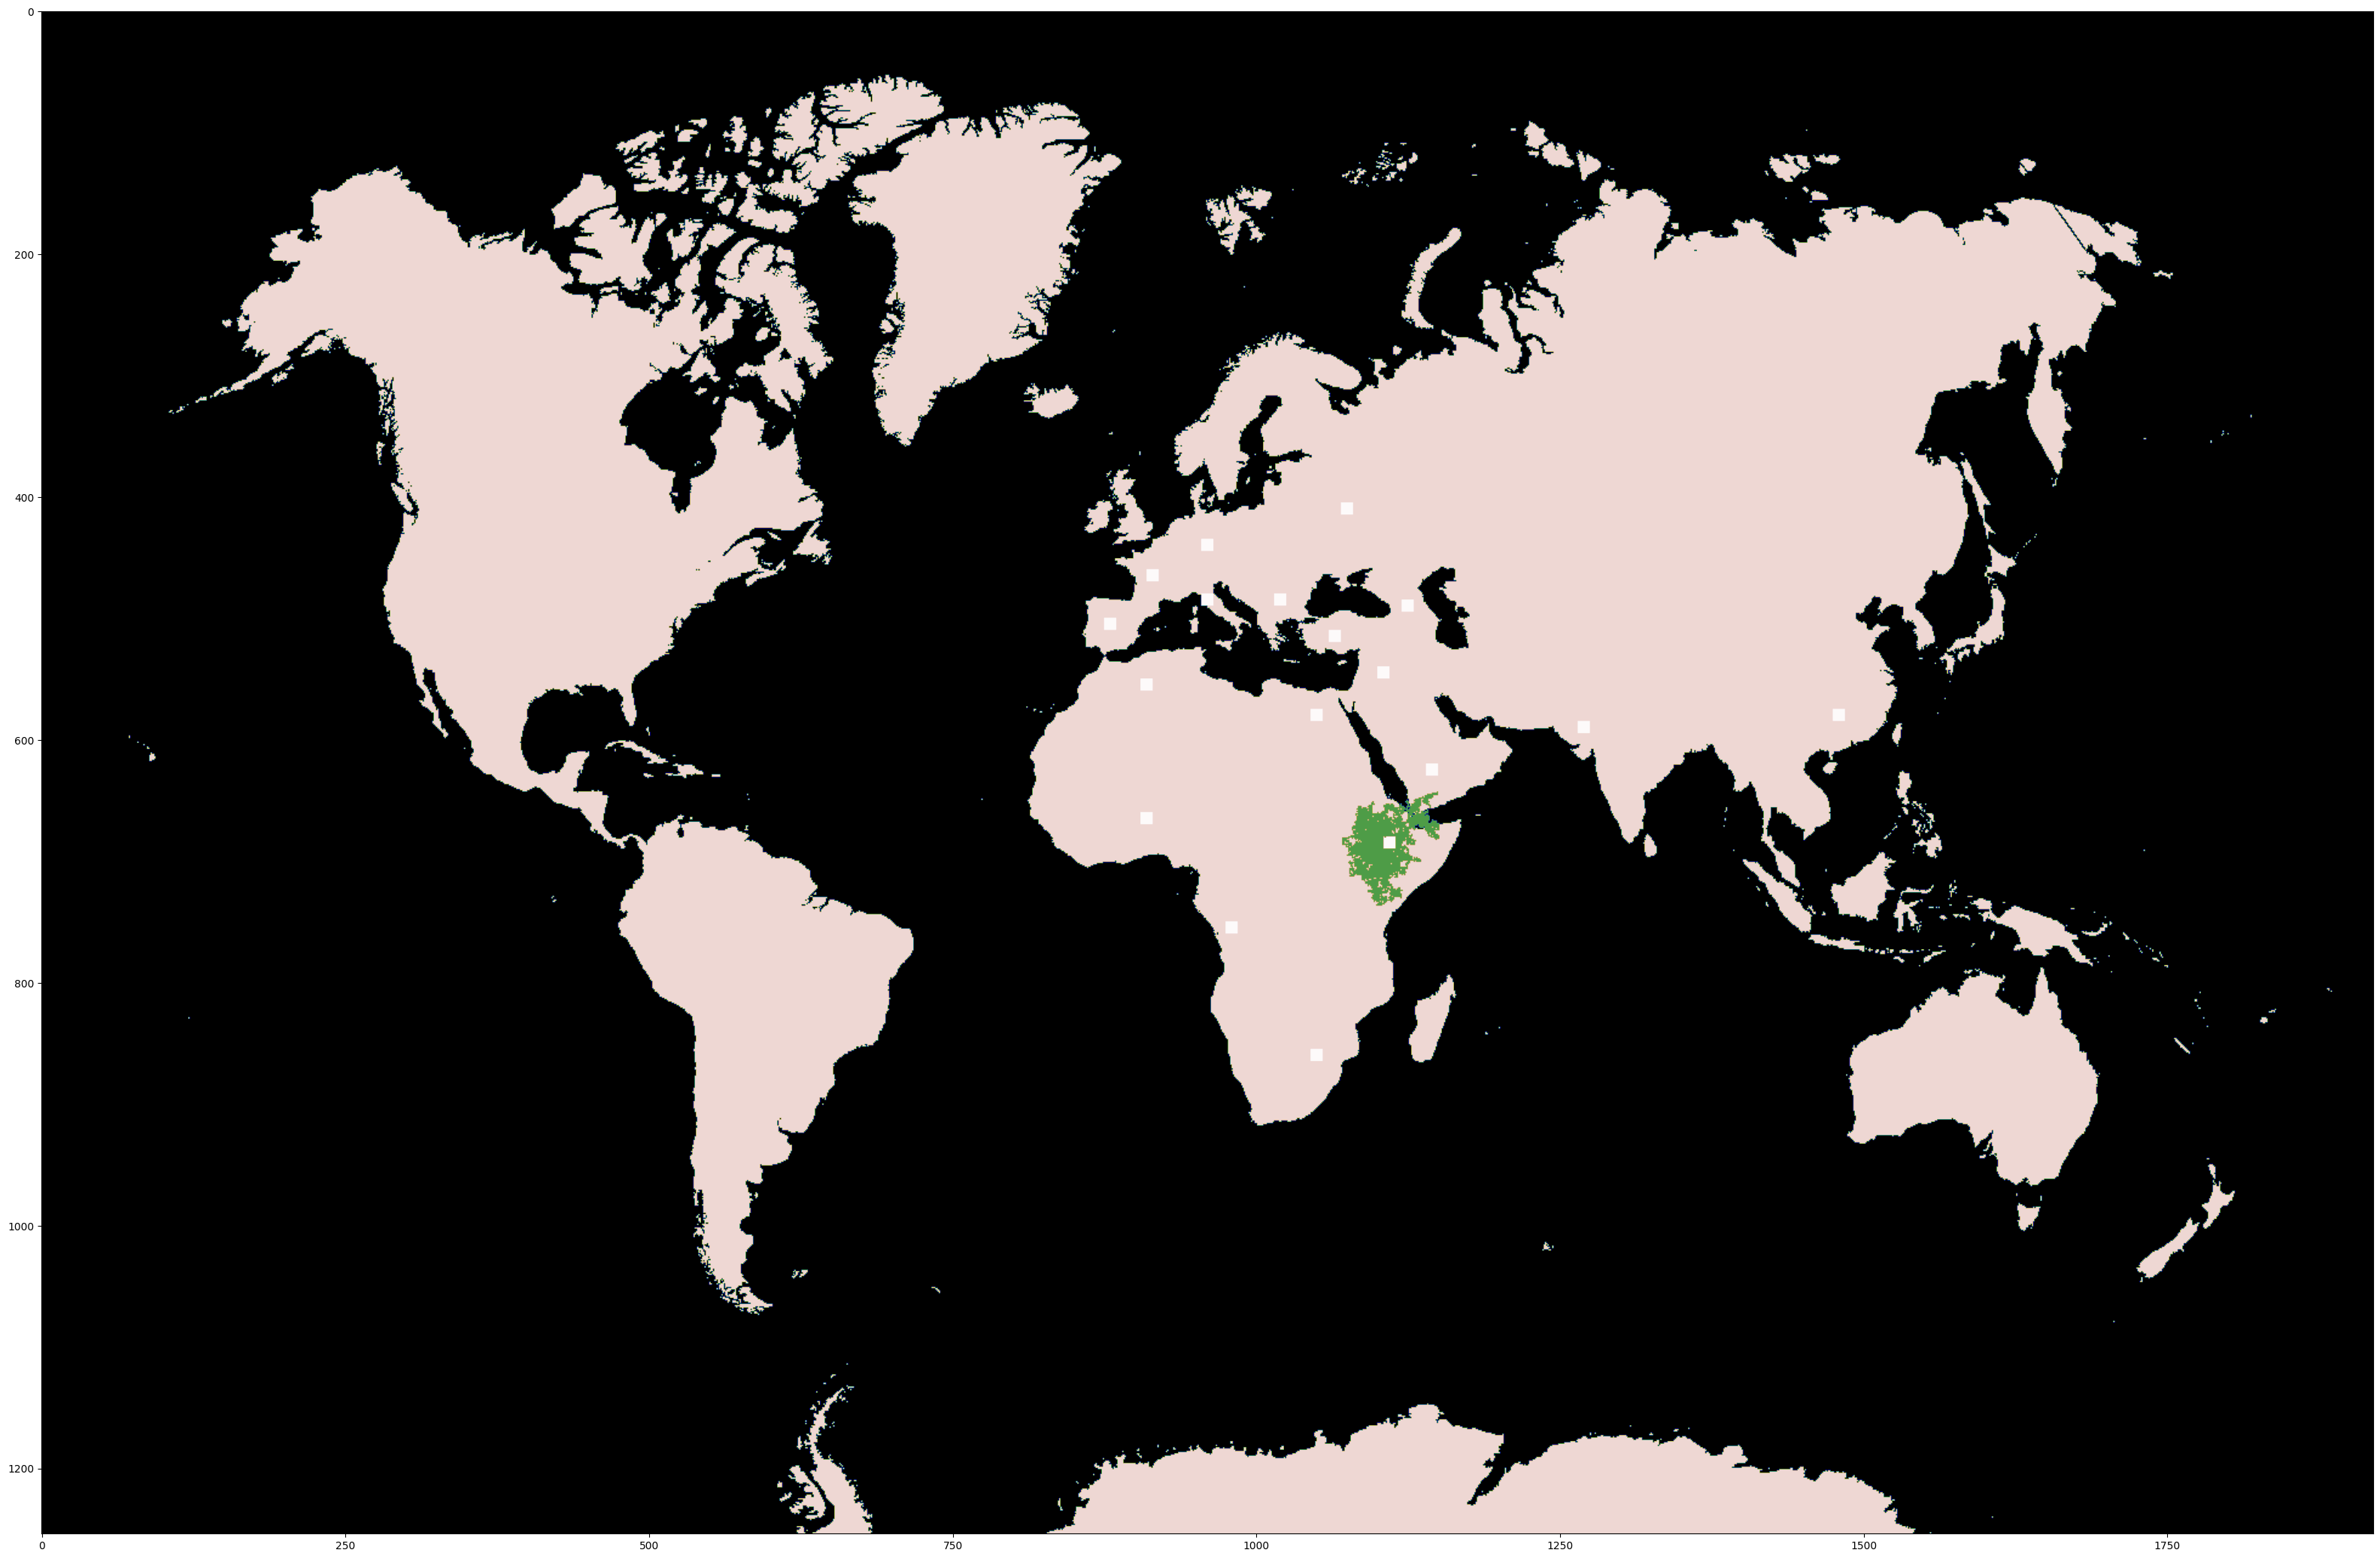

In [747]:
fig = plt.figure(figsize = (40,40))
plt.imshow(reward_map, cmap = 'gist_earth')
plt.show()

## References

[1] McDougall, I., Brown, F. & Fleagle, J. *Stratigraphic placement and age of modern humans from Kibish, Ethiopia.* **Nature** 433, 733–736 (2005). https://doi.org/10.1038/nature03258

[2] López S, van Dorp L, Hellenthal G. *Human Dispersal Out of Africa: A Lasting Debate.* **Evol Bioinform Online.** 2016 Apr 21; 11(Suppl 2):57-68. doi: https://doi.org/10.4137/EBO.S33489

[3] Yang M. *A genetic history of migration, diversification, and admixture in Asia.* **Hum Popul Genet Genom.** 2022; 2(1):0001. https://doi.org/10.47248/hpgg2202010001